<a href="https://colab.research.google.com/github/SorrowAddict/SK-FLY-AI/blob/main/AI_Learning/Week-03_DACON_AI_Training/240102_%EC%A0%9C%EC%A3%BC%EB%8F%84_%EC%99%B8%EA%B5%AD%EC%9D%B8%EA%B4%80%EA%B4%91%EA%B0%9D_RNN_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [ ]:
import pandas as pd
import glob

# 파일 경로 및 파일명 설정
file_path = '/content'  # 실제 파일이 저장된 경로로 변경
file_pattern = '제주특별자치도_*.csv'  # 파일명 패턴으로 변경

# 해당 경로의 모든 .csv 파일을 읽어오기
file_list = glob.glob(file_path + file_pattern)

# 데이터프레임을 저장할 리스트 생성
dfs = []

# 각 파일을 읽어와서 리스트에 추가
for file in file_list:
    df = pd.read_csv(file, encoding='cp949')  # 파일의 인코딩에 따라 수정
    df = df.drop('관련부서', axis=1, errors='ignore')  # '관련부서' 열이 없는 파일도 고려
    dfs.append(df)

# 모든 데이터프레임을 하나로 합치기
merged_df = pd.concat(dfs, ignore_index=True)

# 결과 확인
print(merged_df.head())

# 합친 데이터프레임을 새로운 .csv 파일로 저장
merged_df.to_csv('/content/merged_data.csv', index=False)  # 저장 경로 및 파일명으로 변경


In [ ]:
import pandas as pd
import os

# 1. pandas 라이브러리 import
# 2. 각 CSV 파일 불러오기 및 DataFrame으로 변환
dataframes = []  # 각 연도의 DataFrame을 담을 리스트

# 예를 들어, 파일명이 "제주특별자치도_외국인관광객현황_20230224.csv" 등으로 되어 있다고 가정합니다.
directory = '/content/'  # 디렉토리 경로를 적절히 수정해주세요.

for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        filepath = os.path.join(directory, filename)

        # 파일을 UTF-8 대신 다른 인코딩으로 읽어오기 (예: cp949)
        try:
            df = pd.read_csv(filepath, encoding='cp949')
        except pd.errors.ParserError as e:
            print(f"Error in file {filename}: {e}")
            continue  # 에러 발생 시 해당 파일은 건너뛰고 다음 파일로 이동

        dataframes.append(df)

# 3. DataFrame 합치기
final_df = pd.concat(dataframes, ignore_index=True)

# 결과 확인
print(final_df)


       해당연월     일본      중국    홍콩     대만    싱가폴  말레이시아  인도네시아   베트남    태국  \
0   2017-01   1905  184306  3109   1450   4014   5013   1524  1220   908   
1   2017-02   1816  180094  3058   1421   1578   4851    962   981  1088   
2   2017-03   2940   87669  2609   1259   2569   4439   1521  1447  1126   
3   2017-04   4119   28988  6066   2141   6786  10113   3439  2925  3135   
4   2017-05   3652   31382  4959   2069   3711   5659   3015  2306  4207   
5   2017-06   6709   33184  5519   3103   4468   5750   2780  2666  2603   
6   2017-07   4894   40825  6532   3384   2655   2827   3205  4061  2759   
7   2017-08   7768   38560  5247   3711   1147   1356   1043  1490   920   
8   2017-09   6710   30753  4344   3256   1313    959    780  1769  1110   
9   2017-10   5659   32175  3919   3115   1270   1615   1427  3171   819   
10  2017-11   6222   28329  2061   2254   1219   1605   1311  1213   640   
11  2017-12   2965   31050  1529   1831   3002   5337   2058  1057  4475   
12  2018-01 

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# # 데이터 로드
# final_df = pd.DataFrame(data)

# '데이터기준일자' 열 삭제
final_df = final_df.drop('데이터기준일자', axis=1)

# '해당연월' 열을 날짜 정보로 변환하여 인덱스로 설정
final_df['해당연월'] = pd.to_datetime(final_df['해당연월'] + '-01')  # 날짜의 일자를 1일로 설정
final_df = final_df.set_index('해당연월')

# 데이터 정규화 (MinMaxScaler 사용)
scaler = MinMaxScaler()
final_df_scaled = scaler.fit_transform(final_df)

# 정규화된 데이터로 새로운 데이터프레임 생성
final_df_normalized = pd.DataFrame(final_df_scaled, columns=final_df.columns, index=final_df.index)

# 결과 확인
print(final_df_normalized)


                  일본        중국        홍콩        대만       싱가폴     말레이시아  \
해당연월                                                                     
2017-01-01  0.019931  0.427159  0.364542  0.126907  0.289474  0.289204   
2017-02-01  0.013082  0.415624  0.357855  0.124034  0.092832  0.279005   
2017-03-01  0.099577  0.162509  0.298977  0.107985  0.172829  0.253069   
2017-04-01  0.190304  0.001805  0.752295  0.195364  0.513239  0.610261   
2017-05-01  0.154367  0.008361  0.607133  0.188231  0.265015  0.329871   
2017-06-01  0.389611  0.013296  0.680566  0.290668  0.326122  0.335600   
2017-07-01  0.249942  0.034222  0.813402  0.318506  0.179771  0.151590   
2017-08-01  0.471104  0.028019  0.644899  0.350902  0.058040  0.058986   
2017-09-01  0.389688  0.006638  0.526488  0.305825  0.071440  0.033994   
2017-10-01  0.308811  0.010533  0.470758  0.291857  0.067969  0.075291   
2017-11-01  0.352135  0.000000  0.227118  0.206558  0.063852  0.074662   
2017-12-01  0.101501  0.007452  0.1573

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 시계열 데이터를 X와 y로 나누기
X = final_df_scaled[:-1]
y = final_df_scaled[1:]

# 데이터 분할
X_train, X_test, y_train, y_test = X[:-12], X[-12:], y[:-12], y[-12:]

# 모델 구성
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X.shape[1], 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

# 모델 훈련
model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, epochs=50, batch_size=8)

# 모델 평가
mse = model.evaluate(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test)
print(f'테스트 데이터의 평균 제곱 오차: {mse}')

# 1년 동안의 예측
future_data = X_test[-1:].reshape((1, X_test.shape[1], 1))  # 초기 예측 데이터를 3D로 변환
predictions = []

for _ in range(12):
    prediction = model.predict(future_data)
    predictions.append(prediction[0, 0])  # 단일 예측 값을 가져옴
    future_data = np.append(future_data[:, 1:, :], prediction.reshape((1, 1, 1)), axis=1)

# 예측된 데이터를 역정규화
predictions = np.array(predictions).reshape(-1, 1)
predictions = scaler.inverse_transform(predictions).reshape(-1)  # shape를 (12,)으로 변경

# 예측 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(final_df.index[-12:], final_df[-12:], label='실제 데이터', marker='o')
plt.plot(final_df.index[-12:], predictions, label='예측 데이터', marker='o')
plt.title('RNN 모델을 사용한 1년 동안의 외국인 방문자 수 예측')
plt.xlabel('해당연월')
plt.ylabel('방문자 수')
plt.legend()
plt.show()


Epoch 1/50
6/6 [==============================] - 1s 5ms/step - loss: 0.1887
Epoch 2/50
6/6 [==============================] - 0s 4ms/step - loss: 0.1442
Epoch 3/50
6/6 [==============================] - 0s 4ms/step - loss: 0.1101
Epoch 4/50
6/6 [==============================] - 0s 4ms/step - loss: 0.0806
Epoch 5/50
6/6 [==============================] - 0s 4ms/step - loss: 0.0597
Epoch 6/50
6/6 [==============================] - 0s 4ms/step - loss: 0.0518
Epoch 7/50
6/6 [==============================] - 0s 4ms/step - loss: 0.0540
Epoch 8/50
6/6 [==============================] - 0s 4ms/step - loss: 0.0520
Epoch 9/50
6/6 [==============================] - 0s 4ms/step - loss: 0.0513
Epoch 10/50
6/6 [==============================] - 0s 4ms/step - loss: 0.0513
Epoch 11/50
6/6 [==============================] - 0s 4ms/step - loss: 0.0511
Epoch 12/50
6/6 [==============================] - 0s 4ms/step - loss: 0.0511
Epoch 13/50
6/6 [==============================] - 0s 4ms/step - loss: 0.

ValueError: ignored

AttributeError: ignored

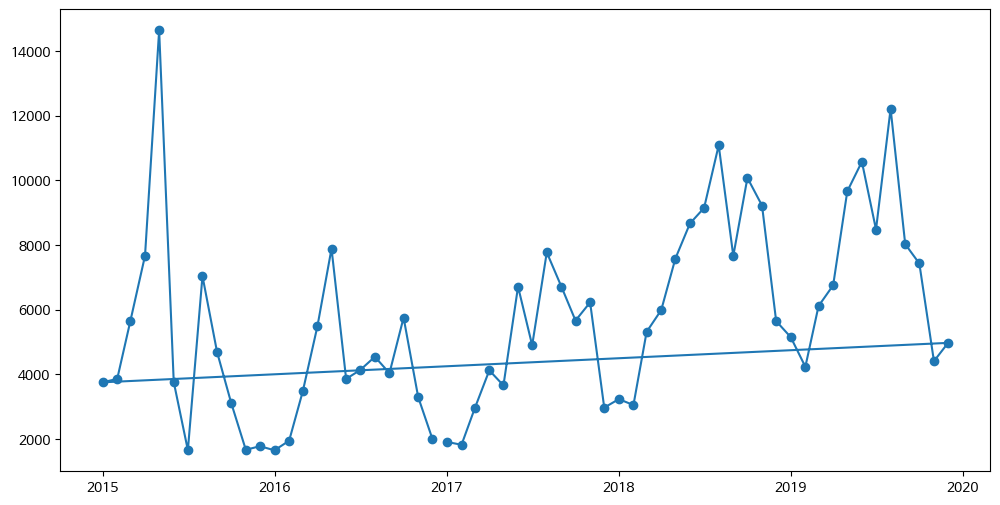

In [ ]:
# 초기 예측 데이터 생성 (X_test의 마지막 데이터 기반)
future_data = X_test[-1:].reshape((1, X_test.shape[1], 1))
predicted_values = []

# 2023-01부터 2023-12까지 예측하지 않고, 있는 데이터셋의 날짜만 시각화
plt.figure(figsize=(12, 6))
for country in final_df.columns:
    plt.plot(final_df.index, final_df[country], label=f'{country} (실제)', marker='o')
    plt.plot(X_test.index, model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))[:, final_df.columns.get_loc(country)],
             label=f'{country} (모델 예측)', marker='o', linestyle='dashed')

plt.title('실제 데이터와 모델 예측 데이터 시각화')
plt.xlabel('해당연월')
plt.ylabel('방문자 수')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 데이터 정규화
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(final_df.iloc[:, 1:-1])

# 시계열 데이터를 X와 y로 나누기
X = scaled_data[:-1]
y = scaled_data[1:]

# 데이터 분할
X_train, X_test, y_train, y_test = X[:-1], X[-1:], y[:-1], y[-1:]

# 모델 구성
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X.shape[1], 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

# 모델 훈련
model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, epochs=50, batch_size=8)

# 모델 평가
mse = model.evaluate(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test)
print(f'테스트 데이터의 평균 제곱 오차: {mse}')

# 예측 결과 시각화
predicted_values = model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
predicted_values = scaler.inverse_transform(predicted_values.reshape(-1, 1))

plt.figure(figsize=(12, 6))
for i, country in enumerate(final_df.columns[1:-1]):
    plt.plot(final_df['해당연월'], final_df[country], label=f'{country} (실제)', marker='o')
    plt.plot(final_df['해당연월'].iloc[-1] + pd.DateOffset(months=1), predicted_values[i], label=f'{country} (모델 예측)', marker='o', linestyle='dashed')

plt.title('2023년 외국인 방문자 수 예측 (실제 및 모델)')
plt.xlabel('해당연월')
plt.ylabel('방문자 수')
plt.legend()
plt.show()


Epoch 1/50
11/11 [==============================] - 1s 4ms/step - loss: 0.1274
Epoch 2/50
11/11 [==============================] - 0s 4ms/step - loss: 0.0885
Epoch 3/50
11/11 [==============================] - 0s 3ms/step - loss: 0.0563
Epoch 4/50
11/11 [==============================] - 0s 3ms/step - loss: 0.0492
Epoch 5/50
11/11 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 6/50
11/11 [==============================] - 0s 4ms/step - loss: 0.0461
Epoch 7/50
11/11 [==============================] - 0s 3ms/step - loss: 0.0443
Epoch 8/50
11/11 [==============================] - 0s 3ms/step - loss: 0.0437
Epoch 9/50
11/11 [==============================] - 0s 4ms/step - loss: 0.0433
Epoch 10/50
11/11 [==============================] - 0s 3ms/step - loss: 0.0433
Epoch 11/50
11/11 [==============================] - 0s 3ms/step - loss: 0.0424
Epoch 12/50
11/11 [==============================] - 0s 4ms/step - loss: 0.0422
Epoch 13/50
11/11 [==============================

ValueError: ignored

Epoch 1/50
8/8 [==============================] - 1s 2ms/step - loss: 0.1363
Epoch 2/50
8/8 [==============================] - 0s 2ms/step - loss: 0.1220
Epoch 3/50
8/8 [==============================] - 0s 3ms/step - loss: 0.1090
Epoch 4/50
8/8 [==============================] - 0s 2ms/step - loss: 0.0976
Epoch 5/50
8/8 [==============================] - 0s 2ms/step - loss: 0.0878
Epoch 6/50
8/8 [==============================] - 0s 2ms/step - loss: 0.0794
Epoch 7/50
8/8 [==============================] - 0s 2ms/step - loss: 0.0706
Epoch 8/50
8/8 [==============================] - 0s 2ms/step - loss: 0.0637
Epoch 9/50
8/8 [==============================] - 0s 2ms/step - loss: 0.0570
Epoch 10/50
8/8 [==============================] - 0s 2ms/step - loss: 0.0516
Epoch 11/50
8/8 [==============================] - 0s 2ms/step - loss: 0.0468
Epoch 12/50
8/8 [==============================] - 0s 2ms/step - loss: 0.0435
Epoch 13/50
8/8 [==============================] - 0s 3ms/step - loss: 0.

ValueError: ignored

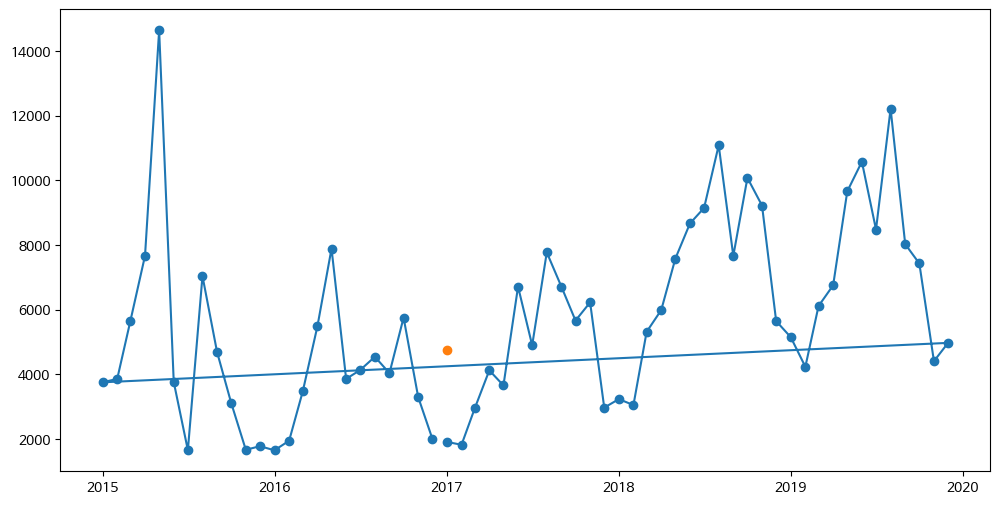

In [ ]:
# '데이터기준일자' 열 삭제
final2_df = final_df.drop('데이터기준일자', axis=1, errors='ignore')

# '해당연월'을 시계열 데이터의 인덱스로 설정
# final2_df = final2_df.set_index('해당연월')

# 데이터 정규화
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(final2_df['일본'].values.reshape(-1, 1))

# 시계열 데이터를 X와 y로 나누기
X = scaled_data[:-1]
y = scaled_data[1:]

# 데이터 분할
X_train, X_test, y_train, y_test = X[:-1], X[-1:], y[:-1], y[-1:]

# 모델 구성
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X.shape[1], 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

# 모델 훈련
model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, epochs=50, batch_size=8)

# 모델 평가
mse = model.evaluate(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test)
print(f'테스트 데이터의 평균 제곱 오차: {mse}')

# 예측 결과 시각화
predicted_values = model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
predicted_values = scaler.inverse_transform(predicted_values.reshape(-1, 1))

# 2020-01부터 2020-12까지의 예측 결과 생성
future_dates = pd.date_range(start='2020-01', periods=12, freq='M')
future_values = model.predict(X[-12:].reshape((1, 12, 1)))
future_values = scaler.inverse_transform(future_values.reshape(-1, 1))

# 예측 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(final2_df.index, final2_df['일본'], label='일본 (실제)', marker='o')
plt.plot(final2_df.index[-1] + pd.DateOffset(months=1), predicted_values, label='일본 (모델 예측)', marker='o', linestyle='dashed')
plt.plot(future_dates, future_values, label='일본 (2020-01~2020-12 예측)', marker='o', linestyle='dashed', color='orange')

plt.title('2023년 일본 외국인 방문자 수 예측 (실제, 모델 예측 및 2020-01~2020-12 예측)')
plt.xlabel('해당연월')
plt.ylabel('방문자 수')
plt.legend()
plt.show()

1/1 [==============================] - 0s 21ms/step


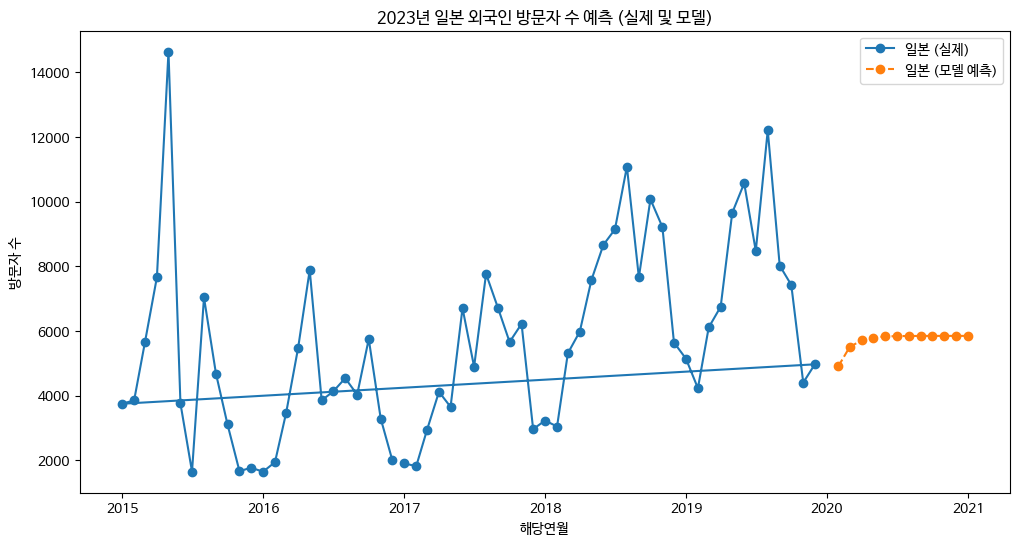

In [ ]:
# 테스트데이터의 마지막 월을 시작으로 미래 12개월에 대한 예측 데이터 생성
future_data = X_test[-1:].copy()

# 2020-01부터 예측을 하도록 설정
start_date = pd.to_datetime('2020-01')
end_date = start_date + pd.DateOffset(months=12)
date_range = pd.date_range(start=start_date, end=end_date, freq='M')

# 2020-01부터 2020-12까지의 예측 결과 생성
predictions = []

for _ in range(12):
    prediction = model.predict(future_data.reshape((1, future_data.shape[0], 1)))
    predictions.append(prediction[0, 0])  # 단일 예측 값을 가져옴
    future_data = np.append(future_data[1:], prediction.reshape(1, 1), axis=0)

# 역정규화
predictions = np.array(predictions).reshape(-1, 1)
predictions = scaler.inverse_transform(predictions)

# 예측 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(final2_df.index, final2_df['일본'], label='일본 (실제)', marker='o')
plt.plot(date_range, predictions, label='일본 (모델 예측)', marker='o', linestyle='dashed')

plt.title('2023년 일본 외국인 방문자 수 예측 (실제 및 모델)')
plt.xlabel('해당연월')
plt.ylabel('방문자 수')
plt.legend()
plt.show()


In [ ]:
# 초기화
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X.shape[1], 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')

# 모델 훈련
model.fit(X.reshape((X.shape[0], X.shape[1], 1)), y, epochs=50, batch_size=8)

# 예측 시작 날짜 설정
start_date = pd.to_datetime('2015-01')
end_date = pd.to_datetime('2020-12')

# 초기 예측 데이터 생성
initial_data = scaled_data[-X.shape[1]:].reshape((1, X.shape[1], 1))
predictions = []

# 2015-01부터 2020-12까지의 예측 결과 생성
for _ in pd.date_range(start=start_date, end=end_date, freq='M'):
    prediction = model.predict(initial_data)
    predictions.append(prediction[0, 0])
    initial_data = np.append(initial_data[0, 1:, :], prediction.reshape((1, 1, 1)), axis=1)

# 역정규화
predictions = np.array(predictions).reshape(-1, 1)
predictions = scaler.inverse_transform(predictions)

# 예측 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(final2_df.index, final2_df['일본'], label='일본 (실제)', marker='o')
plt.plot(pd.date_range(start=start_date, end=end_date, freq='M'), predictions, label='일본 (모델 예측)', marker='o', linestyle='dashed')

plt.title('2015년부터 2020년까지의 일본 외국인 방문자 수 예측 (실제 및 모델)')
plt.xlabel('해당연월')
plt.ylabel('방문자 수')
plt.legend()
plt.show()


Epoch 1/50
8/8 [==============================] - 1s 2ms/step - loss: 0.1364
Epoch 2/50
8/8 [==============================] - 0s 2ms/step - loss: 0.1260
Epoch 3/50
8/8 [==============================] - 0s 2ms/step - loss: 0.1172
Epoch 4/50
8/8 [==============================] - 0s 2ms/step - loss: 0.1080
Epoch 5/50
8/8 [==============================] - 0s 2ms/step - loss: 0.0993
Epoch 6/50
8/8 [==============================] - 0s 2ms/step - loss: 0.0911
Epoch 7/50
8/8 [==============================] - 0s 2ms/step - loss: 0.0831
Epoch 8/50
8/8 [==============================] - 0s 2ms/step - loss: 0.0758
Epoch 9/50
8/8 [==============================] - 0s 2ms/step - loss: 0.0681
Epoch 10/50
8/8 [==============================] - 0s 2ms/step - loss: 0.0616
Epoch 11/50
8/8 [==============================] - 0s 2ms/step - loss: 0.0563
Epoch 12/50
8/8 [==============================] - 0s 2ms/step - loss: 0.0508
Epoch 13/50
8/8 [==============================] - 0s 2ms/step - loss: 0.

ValueError: ignored